# Ford GoBike System Data Exploration
## Ping-Lun Yeh

## Preliminary Wrangling

This dataset includes around 192,000 attributes for every individual ride made in a bike-sharing system covering the greater San Francisco Bay area. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

I would like to separate the dataset into two sections: 
1. users informaiton 
2. start and end stations information

In [2]:
df = pd.read_csv('201901-fordgobike-tripdata-1.csv')

print(df.shape)
print(df.dtypes)
print(df.head(10))

(192082, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         80825  2019-01-31 17:57:44.6130  2019-02-01 16:24:49.8640   
1         65900  2019-01-31 20:58:33.8860  2019-02-01 15:16:54.1730   
2         62633  2019-01-31 18:06:52.9240  2019-02-01 11:30:46.5300   
3         44680  2019-01-31 19:46:09.7190  2019-02-01 08:10:50.3180   
4         60709  2019-01-31 14:19:01.5410  2019-02-01 07:1

In [3]:
# clean missing value (182,000 left)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182122 entries, 0 to 192081
Data columns (total 16 columns):
duration_sec               182122 non-null int64
start_time                 182122 non-null object
end_time                   182122 non-null object
start_station_id           182122 non-null float64
start_station_name         182122 non-null object
start_station_latitude     182122 non-null float64
start_station_longitude    182122 non-null float64
end_station_id             182122 non-null float64
end_station_name           182122 non-null object
end_station_latitude       182122 non-null float64
end_station_longitude      182122 non-null float64
bike_id                    182122 non-null int64
user_type                  182122 non-null object
member_birth_year          182122 non-null float64
member_gender              182122 non-null object
bike_share_for_all_trip    182122 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 23.6+ MB


In [4]:
# Separate the dataset and analyze user information at first

cust = df[['bike_id','user_type','member_birth_year','member_gender','bike_share_for_all_trip']]
cust.head()

,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,4861,Subscriber,1989.0,Male,No
1,5506,Subscriber,1989.0,Male,No
2,2717,Customer,1965.0,Female,No
3,4557,Customer,1974.0,Male,No
5,3532,Subscriber,1994.0,Male,No


In [5]:
print(cust['user_type'].value_counts());
print('')
print(cust['member_gender'].value_counts())
print('')
print(cust['bike_share_for_all_trip'].value_counts())
print('')
print(cust['member_birth_year'].describe())

Subscriber    164354
Customer       17768
Name: user_type, dtype: int64

Male      135065
Female     43504
Other       3553
Name: member_gender, dtype: int64

No     166057
Yes     16065
Name: bike_share_for_all_trip, dtype: int64

count    182122.000000
mean       1984.146210
std          10.098191
min        1900.000000
25%        1979.000000
50%        1986.000000
75%        1991.000000
max        2001.000000
Name: member_birth_year, dtype: float64


### What is the structure of your dataset?

After filtering all the missing values, there are still 182,122 attributes with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip) in this dataset. Therefore, I decide to separate this dataset into two sections which are "user" and "bike station" information. In my opinion, I am more interested in "user" information rather than "bike station"; therefore, I determine to dig deeper into this part in order to increase business understanding.   


### What is/are the main feature(s) of interest in your dataset?

I am more interested in people with different kinds of backgrounds, so I want to explore user information which are user_type, member_birth_year, member_gender, and  bike_share_for_all_trip rather than bike station information in this dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect member_birth_year (age) will have significant effects rather than other features: the younger the user, the more the bike usage. I also believe other features such as user_type, member_gender, and bike_share_for_all_trip will have effects on the bike usage. 


## Univariate Exploration

I start by looking for user_type, member_gender, and bike_share_for_all_trip.  

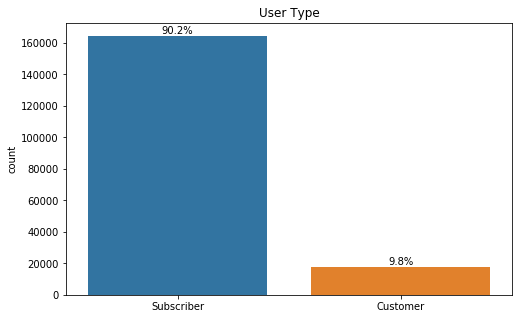

In [6]:
# Looking deeper for "user_type"

count = len(cust)
plt.figure(figsize=[8,5])

ax = sb.countplot(data = cust, x = 'user_type')
plt.title('User Type')
plt.xlabel('');

for i in ax.patches:
    x = i.get_bbox().get_points()[:,0]
    y = i.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/count), (x.mean(), y), ha='center', va='bottom') 


Obviously, most users are subscribers (90.2%) much more than customers (9.8%). 

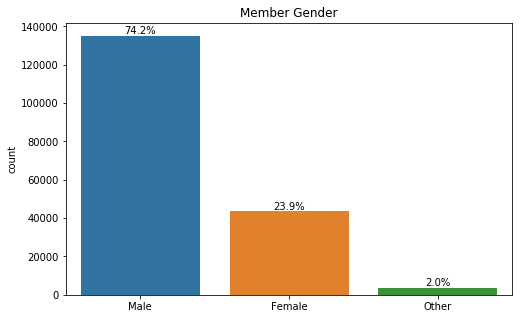

In [7]:
# Looking deeper for "member_gender"

count = len(cust)
plt.figure(figsize=[8,5])

ax = sb.countplot(data = cust, x = 'member_gender')
plt.title('Member Gender')
plt.xlabel('');

for i in ax.patches:
    x = i.get_bbox().get_points()[:,0]
    y = i.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/count), (x.mean(), y), ha='center', va='bottom') 
    

From above, I can tell that most users are male (74.2%) much more than female (23.9%) and others (1.9%).

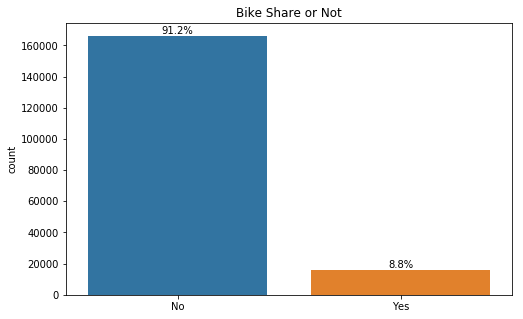

In [8]:
# Looking deeper for "bike_share_for_all_trip"

count = len(cust)
plt.figure(figsize=[8,5])

ax = sb.countplot(data = cust, x = 'bike_share_for_all_trip')
plt.title('Bike Share or Not')
plt.xlabel('');

for i in ax.patches:
    x = i.get_bbox().get_points()[:,0]
    y = i.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/count), (x.mean(), y), ha='center', va='bottom') 
    

From above, I can tell that most users do not share their bikes to others (91.2% > 8.8%).

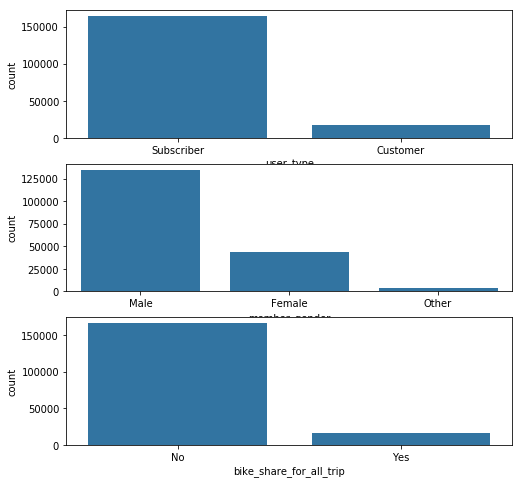

In [9]:
# Plot all three variables together to get an idea of the distribution

fig, ax = plt.subplots(nrows=3, figsize=[8,8]) 

base_color = sb.color_palette()[0]
sb.countplot(data = cust, x = 'user_type', color = base_color, ax = ax[0])
sb.countplot(data = cust, x = 'member_gender', color = base_color, ax = ax[1])
sb.countplot(data = cust, x = 'bike_share_for_all_trip', color = base_color, ax = ax[2])
plt.show();

From above, I can easily conclude that there are more **male subscribers who do not share their bikes during the trips**.

In [10]:
# Statistics for memeber_birth_year (age)

cust['member_birth_year'].describe()

count    182122.000000
mean       1984.146210
std          10.098191
min        1900.000000
25%        1979.000000
50%        1986.000000
75%        1991.000000
max        2001.000000
Name: member_birth_year, dtype: float64

/Users/alen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


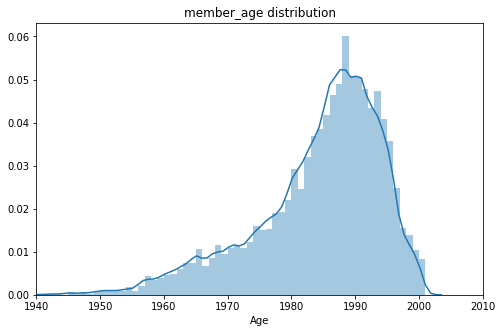

In [11]:
# Looking deeper for "member_birth_year"

plt.figure(figsize=[8,5])

bin_size = np.arange(1940, cust['member_birth_year'].max()+1, 1) 
sb.distplot(cust['member_birth_year'], bins = bin_size, hist_kws = {'alpha':0.4})
plt.title('member_age distribution')
plt.xlabel('Age')
plt.xlim(1940,2010);

As shown, most users were born in 1986 (33 years old) and the mean birth year is around 1984 (35 years old).

In [12]:
# Statistics for "duration_sec"

df['duration_sec'].describe()

count    182122.000000
mean        715.254857
std        1529.109096
min          61.000000
25%         329.000000
50%         520.000000
75%         804.000000
max       84002.000000
Name: duration_sec, dtype: float64

From above, I can tell the standard deviation is really large which means duration time depending on individual user habits.

count    10.000000
mean      0.003113
std       0.025192
min      -0.033149
25%      -0.011528
50%      -0.000810
75%       0.016034
max       0.057887
dtype: float64

85410     0.057887
33625    -0.011528
33626    -0.011528
65393    -0.016004
90596     0.020526
47960     0.018794
0        -0.033149
56339     0.007755
17900    -0.000085
169113   -0.001534
dtype: float64


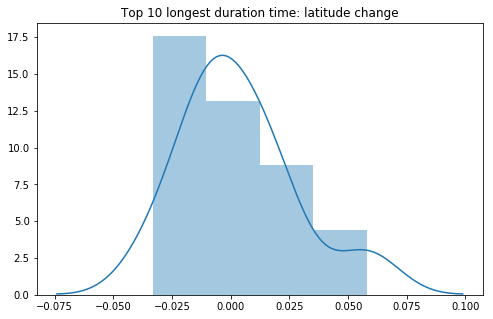

In [13]:
# Statistics for top 10 longest duration time (latitude)

topten = df['duration_sec'].sort_values(ascending = False)[0:10]
most_time = df.loc[df['duration_sec'].isin(topten)]
order_most = most_time.sort_values(by='duration_sec', ascending = False)

most = order_most['start_station_latitude'] - order_most['end_station_latitude']

print(most.describe())
print('')
print(most)

plt.figure(figsize=[8,5])
plt.title('Top 10 longest duration time: latitude change')
sb.distplot(most);


From above, I can tell that the average latitude increases slightly, but it actually decreases in the median. That is to say, even though more users move north, few users move south significantly.

count    10.000000
mean     -0.003707
std       0.022307
min      -0.036966
25%      -0.015928
50%      -0.007529
75%       0.008126
max       0.043423
dtype: float64

85410    -0.036966
33625    -0.015640
33626    -0.015640
65393    -0.019535
90596     0.000582
47960     0.001079
0         0.043423
56339     0.010474
17900    -0.016024
169113    0.011177
dtype: float64


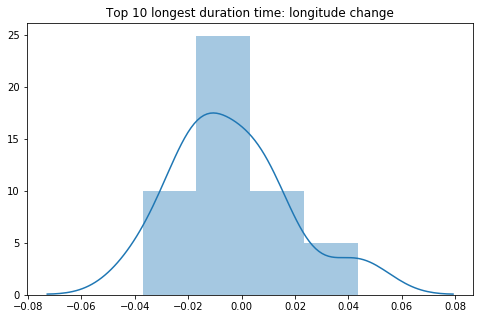

In [14]:
# Statistics for top 10 longest duration time (longitude)

topten = df['duration_sec'].sort_values(ascending = False)[0:10]
most_time = df.loc[df['duration_sec'].isin(topten)]
order_most = most_time.sort_values(by='duration_sec', ascending = False)

most = order_most['start_station_longitude'] - order_most['end_station_longitude']

print(most.describe())
print('')
print(most)

plt.figure(figsize=[8,5])
plt.title('Top 10 longest duration time: longitude change')
sb.distplot(most);


From above, I can tell that the longitude decreases both in average and median. That is to say most users move west in this case.

In [15]:
# Divide the start_time into "AM" and "PM"

AM_PM = []
AM = []
PM = []

for i in df['start_time']:
    hour = i.split(':')[0].split(' ')[1]
    AM_PM.append(hour)
    
for m, n in enumerate(AM_PM):
    if int(n) <= 12: 
        AM.append(n)
    else:
        PM.append(n)


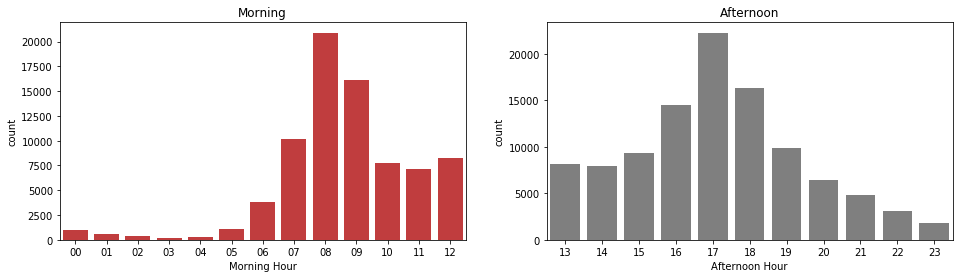

In [16]:
# Comparison between Morning:'AM' and Afternoon:'PM'

plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
base_color = sb.color_palette()[3]
sb.countplot(AM, color = base_color)
plt.title('Morning')
plt.xlabel('Morning Hour')

plt.subplot(1,2,2)
base_color = sb.color_palette()[7]
sb.countplot(PM, color = base_color)
plt.title('Afternoon')
plt.xlabel('Afternoon Hour');


From above, I can tell that most users start their bike renting at around 8 to 9am in the morning and 5 to 6pm in the afternoon.

In [17]:
# Divide the end_time into "AM" and "PM"

AM_PM = []
AM = []
PM = []

for i in df['end_time']:
    hour = i.split(':')[0].split(' ')[1]
    AM_PM.append(hour)
    
for m, n in enumerate(AM_PM):
    if int(n) <= 12: 
        AM.append(n)
    else:
        PM.append(n)


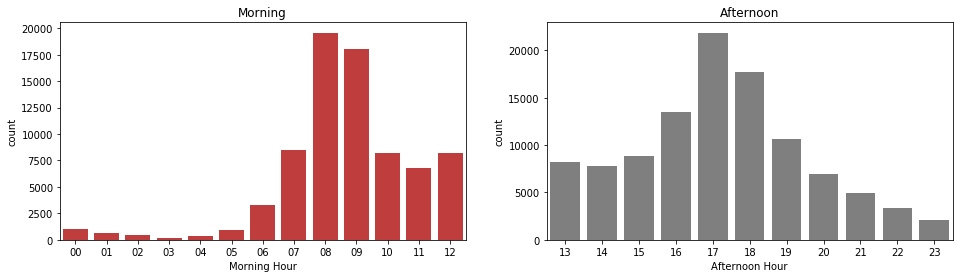

In [18]:
# Comparison between Morning:'AM' and Afternoon:'PM'

plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
base_color = sb.color_palette()[3]
sb.countplot(AM, color = base_color)
plt.title('Morning')
plt.xlabel('Morning Hour')

plt.subplot(1,2,2)
base_color = sb.color_palette()[7]
sb.countplot(PM, color = base_color)
plt.title('Afternoon')
plt.xlabel('Afternoon Hour');


From above, I can tell that most users end their bike renting at around 8 to 9am in the morning and 5 to 6pm in the afternoon which is just the same as the starting time.

### Explore the starting and ending locations 

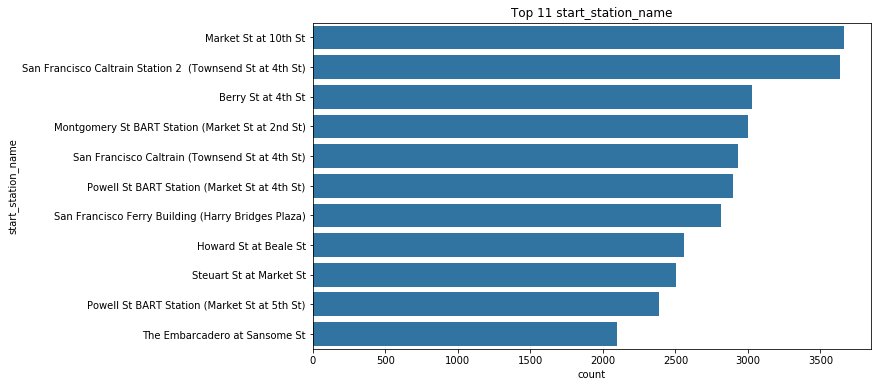

In [19]:
# Top 11 start_station_name

Threshold = 2000
make_frequency = df['start_station_name'].value_counts()
idx = np.sum(make_frequency > Threshold)

most_makes = make_frequency.index[:idx]
df_sub = df.loc[df['start_station_name'].isin(most_makes)]

plt.figure(figsize=[10,6])
plt.title('Top 11 start_station_name')
base_color = sb.color_palette()[0]
sb.countplot(data=df_sub, y='start_station_name', color = base_color, order = most_makes);


From above, I can tell that most users start from Martet St and San Francisco Caltrain Station (#3663, #3635)

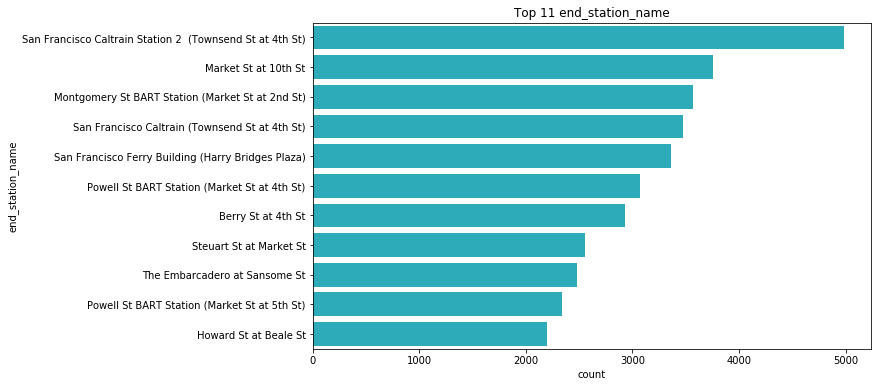

In [20]:
# Top 11 end_station_name

Threshold = 2000
make_frequency = df['end_station_name'].value_counts()
idx = np.sum(make_frequency > Threshold)

most_makes = make_frequency.index[:idx]
df_sub = df.loc[df['end_station_name'].isin(most_makes)]

plt.figure(figsize=[10,6])
base_color = sb.color_palette()[9]
plt.title('Top 11 end_station_name')
sb.countplot(data=df_sub, y='end_station_name', color = base_color, order = most_makes);


From above, I can tell that San Francisco Caltrain Station is the most popular end station (#4986) which means users usually work at San Francisco.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In my opinion, I think the distributions are reasonable and understandable, so there are no unusual points and I do not need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Since I want to know the users' destinations from the data of top 10 longest duration time, I calculate their statistics information and plot them with distribution functions to see where they go. Interestingly, I discover that more users move **northwest** in this case. Furthermore, I separate the start_time and end_time into Morning: AM(0~12) and Afternoon: PM(13~24) respectively. Not surprisingly,  **8 to 9am** has the most user records because it is the time for people to work. On the other hand, **5 to 6pm** has the most user records because most people just finish their works and ready to go home.   

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations between latitude and longitude in this dataset.

In [21]:
numeric_vars=['start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude']

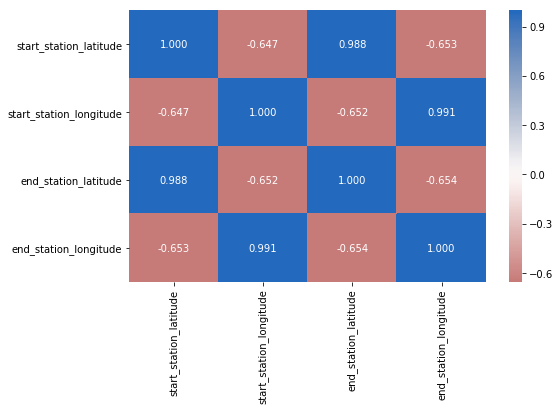

In [22]:
# correlation plot

plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

/Users/alen/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/alen/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alen/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


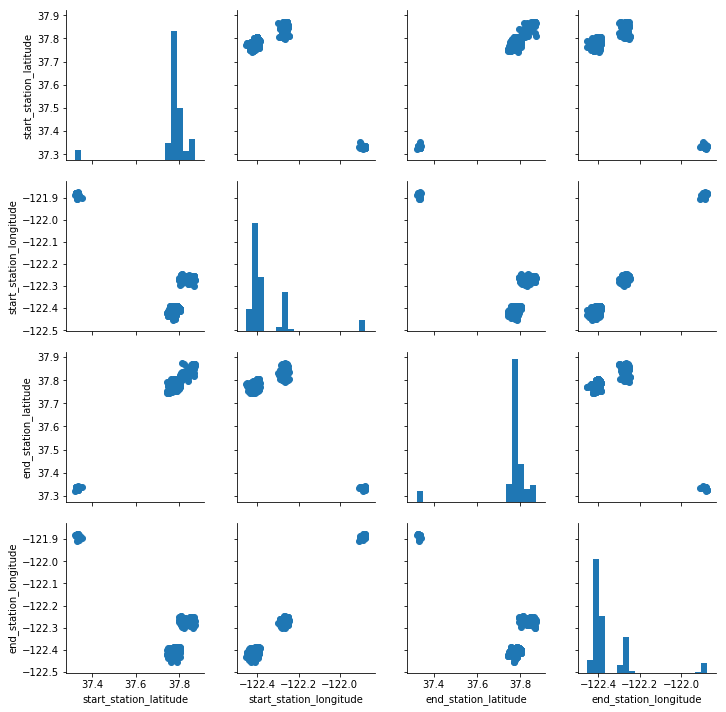

In [23]:
# plot matrix: sample 500 attributes so that plots are clearer 

samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### Directions Definition : { [+ : east, north ]  ,  [- : west, south] }

From above correlation plot and plot matrix, I can tell that when the start_station_latitude increases 1 unit, the start_station_longitude will decrease 0.647 unit which means users move toward **Northwest**.
When the start_station_latitude increases 1 unit, the end_station_latitude will increase 0.988 unit which means users move slightly toward to **North**.
When the start_station_latitude increases 1 unit, the end_station_longitude will decrease 0.653 unit which means users move toward to **Northwest**.
When the start_station_longitude increases 1 unit, the end_station_latitude will decrease 0.652 unit which means users move toward to **Southeast**.
When the start_station_longitude increases 1 unit, the end_station_longitude will increase 0.991 unit which means users move slightly toward to **East**.
When the end_station_latitude increases 1 unit, the end_station_longitude will decrease 0.654 unit which means users move slightly toward to **Northwest**.
Luckily, it is just the same as previous results from the top 10 longest duration times.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In the first part, I want to know where did users usually go. Therefore, I build a correlationship plot with four factors which are start_station latitide and longitude, and end_station latitude and longitude. After that I found out **Northwest** has the higher percentages than the other directions. Thus, I distinguish that most users move toward Northwest. In the second part, I would like to prove my assumption is true, so I apply countplot function to plot top 11 start and end station names for references. Surprisingly, my assumption is generally correct and I also find out that **San Francisco Caltrain Station** has higher density than the other stations.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From above analyses, I conclude that more bike users move northwest to San Francisco Caltrain Station at around 8 to 9am in the morning and 5 to 6pm in the afternoon which matches our daily working hours. That is to say most users ride bikes to or from Caltrain station and then switch to the train heading to the destinations. From business insights, it is wise and promising for bike company to work with Caltrain company. They can promote a sale for those users who usually ride the bike first and then train later. By doing so, it can appeal more people to join this promotion event and create more profits. Meanwhile, it can also increase brand loyalty for users if everyting goes well and safely.


## Multivariate Exploration

The main thing that I want to focus on is the user background information. 

In [24]:
# Subscriber

subs = df[df['user_type'] == 'Subscriber']
subs['member_birth_year'].describe()

count    164354.000000
mean       1983.991086
std          10.145504
min        1900.000000
25%        1979.000000
50%        1986.000000
75%        1991.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [25]:
# Customer

cus = df[df['user_type'] == 'Customer']
cus['member_birth_year'].describe()

count    17768.000000
mean      1985.581101
std          9.530875
min       1900.000000
25%       1981.000000
50%       1988.000000
75%       1992.000000
max       2000.000000
Name: member_birth_year, dtype: float64

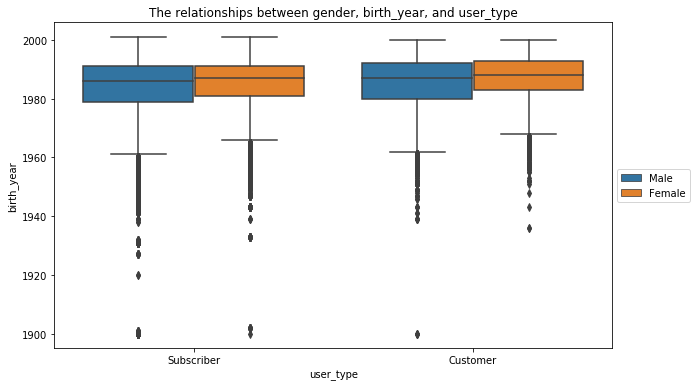

In [26]:
# Boxplot

plt.figure(figsize=[10,6])

cust_sub = cust.loc[cust['member_gender'].isin(['Male','Female'])]
sb.boxplot(data=cust_sub, y='member_birth_year',x='user_type',hue='member_gender')
plt.title('The relationships between gender, birth_year, and user_type')
plt.xlabel('user_type')
plt.ylabel('birth_year')
plt.legend(loc=6, bbox_to_anchor = (1.0, 0.5));


From subscribers perspective, I can distinguish that there are more males than females from above boxplot. Although their average birth year is around 1983, there are still many outliers shown in the plot which means the standard deviation is large. The minimum birth year is 1900 and the maximum is 2001 in this case. In other words, there is no certain type of the users, but users born in 1983 still have the highest portion above all. From customers perspective, there are more males than females shown from the boxplot and their average birth year is around 1985. Also, their minimum birth year is 1900 and the maximum is 2000 in this dataset. However, there are still many outliers in this plot which means users do not come from specific birth year. It makes sense to me because the traffic in San Francisco is really bad which causes more and more people willing to ride bikes.  


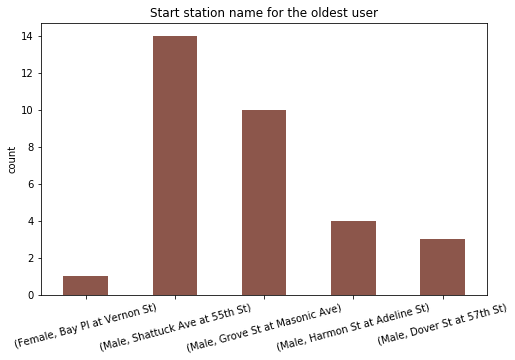

In [27]:
# Further research for users who born in 1900

old = df[df['member_birth_year'] == 1900]

base_color = sb.color_palette()[5]
old.groupby('member_gender')['start_station_name'].value_counts()[0:5].\
                plot(kind = 'bar', color = base_color, figsize=(8,5))
plt.title('Start station name for the oldest user')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=15);


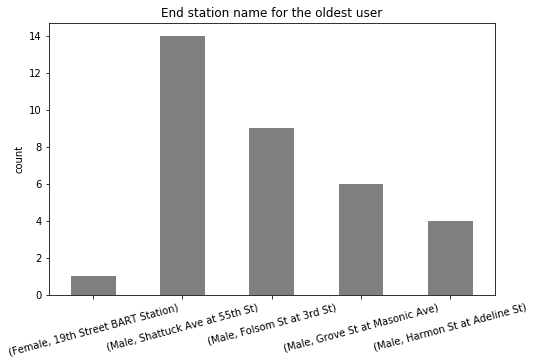

In [28]:
# Further research for users who born in 1900

old = df[df['member_birth_year'] == 1900]

base_color = sb.color_palette()[7]
old.groupby('member_gender')['end_station_name'].value_counts()[0:5].\
                plot(kind = 'bar', color = base_color, figsize=(8,5))
plt.title('End station name for the oldest user')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=15);


After digging deeper into the old users, I was wondering if those records represnt to just a male and a female for several reasons. First of all, it is easy to tell that only one female record shown in both start and end station names. Moreover, the start and end station names are the same which means it is a routine schedule for the users. Therefore, I assume these users are just the same guy. However, I still need more evidences to support my assumption. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Since this is more like a categorical dataset, I use a lot of barplots and histograms to present the results. I find out that there are more males than females in this case. In addition, there are more subscribers than customers as well. The age is around 30~35 years old which means most users are adults who need to work daily. Since many bike users work at San Francisco, they also need to ride Caltrains after biking. Obviously, this is a very useful information for not only bike company but also Caltran company because they can corroborate with each other in order to seize the great business opportunities. 

### Were there any interesting or surprising interactions between features?

During the exploration, I discover that the oldest user is 119 years old which is unbelieveable to me because I cannot image users with this age can still ride the bikes. Furthermore, not just one person but at least one male and female in this case. To me, it is an interesting and surprsing discovery!